In [44]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.graph_objects as go
from scenario import*
import plotly.express as px
from ipywidgets import interact, interactive, fixed, interact_manual

In [45]:
scenarios = []
def extract_scenarios_from_text_files(directory):
    for root, dirs, files in os.walk(directory):
        for dir in dirs:
            source_dir = os.path.join(root, dir)
            for file in os.listdir(source_dir):
                print(file)
                if file.endswith('.txt'):
                    file_path = os.path.join(source_dir, file)
                    try:
                        scenario = Scenario(file_path)
                        scenarios.append(scenario)
                    except Exception as e:
                        print(f"An error occurred while processing {file_path}: {e}")
                        continue
    return scenarios

def scenarios_to_dataframe(scenarios):
    data_dicts = [scenario.to_dict() for scenario in scenarios]
    return pd.DataFrame(data_dicts)

def plot_interactive(df):
    def update_plot(x, y):
        fig = px.scatter(df, x=x, y=y, title=f'{x} vs {y}', labels={x: x, y: y})
        fig.show()

    columns = df.columns
    interact(update_plot, x=columns, y=columns)



In [47]:
# Extracting of scenarios from indoor logs
coaxial_directory = r'data\coaxial\logs'
indoor_directory = r'data\indoor\logs'

scenarios_indoor = extract_scenarios_from_text_files(indoor_directory)
scenarios_coaxial = extract_scenarios_from_text_files(coaxial_directory)

scenarios_indoor_1M = []
scenarios_indoor_2M = []
for scenario in scenarios_indoor:
    if scenario.test_type == 'indoor':
        if scenario.bandwidth == '1M':
            scenarios_indoor_1M.append(scenario)
        elif scenario.bandwidth == '2M':
            scenarios_indoor_2M.append(scenario)

scenarios_coaxial_1M = []
scenarios_coaxial_2M = []
for scenario in scenarios_coaxial:
    if scenario.test_type == 'coaxial':
        if scenario.bandwidth == '1M' :
            scenarios_coaxial_1M.append(scenario)
        elif scenario.bandwidth == '2M':
            scenarios_coaxial_2M.append(scenario)


BC_tests
CO_tests
BC_tests
CO_tests
point_floor_1_1Mhz_indoor_1621.txt
point_floor_2_1Mhz_indoor_1624.txt
point_floor_2_1Mhz_indoor_1637.txt
point_floor_2_1Mhz_indoor_1638.txt
point_floor_2_1Mhz_indoor_1640.txt
point_floor_3_1Mhz_indoor_1629.txt
point_floor_3_1Mhz_indoor_1631.txt
point_floor_4_1Mhz_indoor_1644.txt
point_floor_4_mv_1Mhz_indoor_1645.txt
point_A_1Mhz_indoor_1544.txt
point_B_1Mhz_indoor_1547.txt
point_C_1Mhz_indoor_1550.txt
point_C_1Mhz_indoor_1552.txt
point_D_1Mhz_indoor_1554.txt
point_D_1Mhz_indoor_1557.txt
point_E_1Mhz_indoor_1600.txt
point_E_1Mhz_indoor_1605.txt
point_E_fixed_10_1Mhz_indoor_1615.txt
point_floor_0_2Mhz_indoor_1621.txt
point_floor_1_2Mhz_indoor_1625.txt
point_floor_1_2Mhz_indoor_1627.txt
point_floor_1_2Mhz_indoor_1628.txt
point_floor_1_2Mhz_indoor_1646.txt
point_floor_1_mov_2Mhz_indoor_1648.txt
point_floor_2_2Mhz_indoor_1651.txt
point_floor_2_mov_2Mhz_indoor_1653.txt
point_floor_3_2Mhz_indoor_1656.txt
point_floor_3_mov_2Mhz_indoor_1657.txt
point_floor_4_

In [48]:
mcs_1m_in =[]
tx_rate_1m_in = []
rssi_1m_in = []

mcs_2m_in =[]
tx_rate_2m_in = []
rssi_2m_in = []

mcs_1m_co =[]
tx_rate_1m_co = []
rssi_1m_co = []

mcs_2m_co =[]
tx_rate_2m_co = []
rssi_2m_co = []



for scenario in scenarios_indoor_1M:
    mcs_1m_in.append(scenario.mcs)
    tx_rate_1m_in.append(scenario.rx_iperf_bitrate)
    rssi_1m_in.append(scenario.rssi_median)

for scenario in scenarios_indoor_2M:
    mcs_2m_in.append(scenario.mcs)
    tx_rate_2m_in.append(scenario.rx_iperf_bitrate)
    rssi_2m_in.append(scenario.rssi_median)

for scenario in scenarios_coaxial_1M:
    mcs_1m_co.append(scenario.mcs)
    tx_rate_1m_co.append(scenario.rx_iperf_bitrate)
    rssi_1m_co.append(scenario.rssi_median)

for scenario in scenarios_coaxial_2M:
    mcs_2m_co.append(scenario.mcs)
    tx_rate_2m_co.append(scenario.rx_iperf_bitrate)
    rssi_2m_co.append(scenario.rssi_median)

print(mcs_1m_in.__len__())
print(tx_rate_1m_in.__len__())
print(rssi_1m_in.__len__())

18
18
18


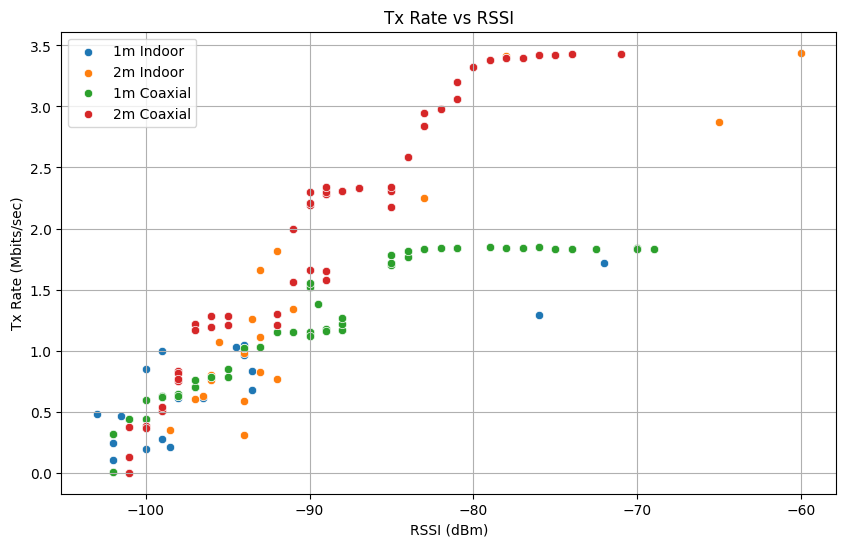

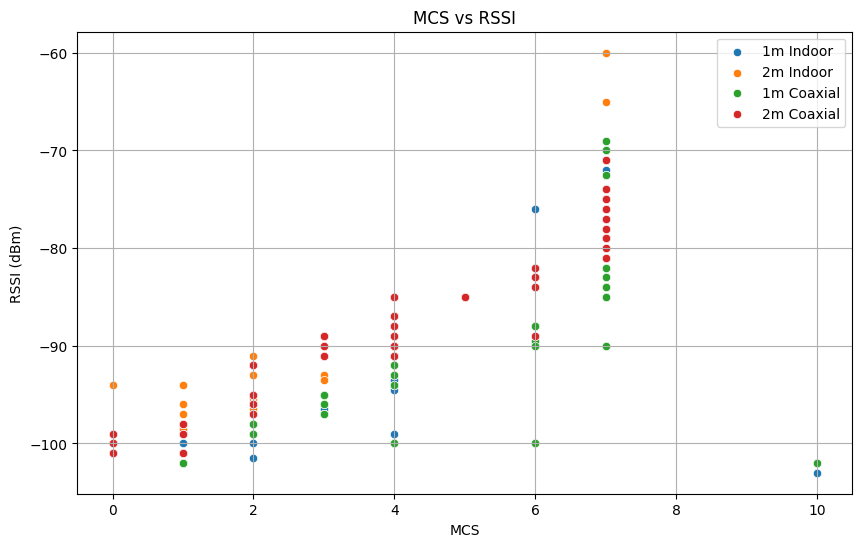

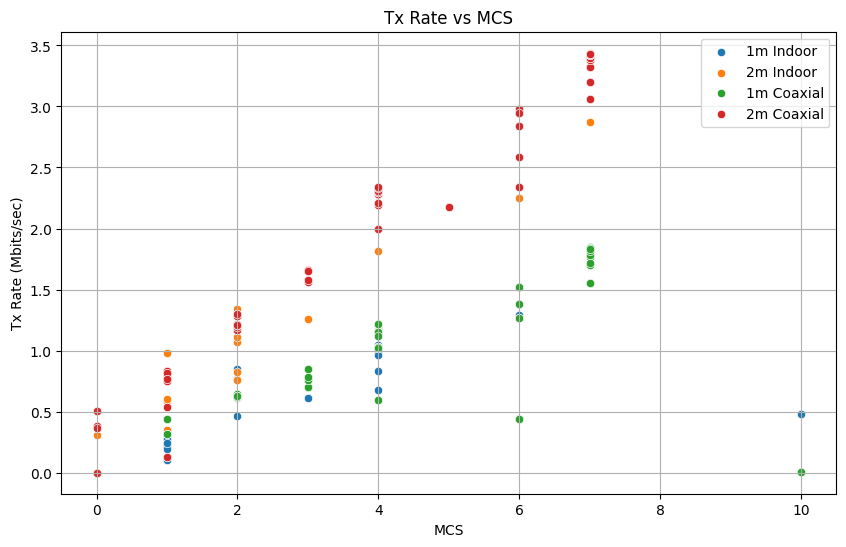

In [51]:
# Creating DataFrames for each scenario
data_1m_in = pd.DataFrame({'MCS': mcs_1m_in, 'Tx Rate': tx_rate_1m_in, 'RSSI': rssi_1m_in, 'Scenario': '1m Indoor'})
data_2m_in = pd.DataFrame({'MCS': mcs_2m_in, 'Tx Rate': tx_rate_2m_in, 'RSSI': rssi_2m_in, 'Scenario': '2m Indoor'})
data_1m_co = pd.DataFrame({'MCS': mcs_1m_co, 'Tx Rate': tx_rate_1m_co, 'RSSI': rssi_1m_co, 'Scenario': '1m Coaxial'})
data_2m_co = pd.DataFrame({'MCS': mcs_2m_co, 'Tx Rate': tx_rate_2m_co, 'RSSI': rssi_2m_co, 'Scenario': '2m Coaxial'})

# Plotting tx_rate vs RSSI
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_1m_in, x='RSSI', y='Tx Rate', label='1m Indoor')
sns.scatterplot(data=data_2m_in, x='RSSI', y='Tx Rate', label='2m Indoor')
sns.scatterplot(data=data_1m_co, x='RSSI', y='Tx Rate', label='1m Coaxial')
sns.scatterplot(data=data_2m_co, x='RSSI', y='Tx Rate', label='2m Coaxial')
plt.title('Tx Rate vs RSSI')
plt.xlabel('RSSI (dBm)')
plt.ylabel('Tx Rate (Mbits/sec)')
plt.legend()
plt.grid()
plt.show()


# Plotting Tx Rate vs MCS
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_1m_in, x='MCS', y='Tx Rate', label='1m Indoor')
sns.scatterplot(data=data_2m_in, x='MCS', y='Tx Rate', label='2m Indoor')
sns.scatterplot(data=data_1m_co, x='MCS', y='Tx Rate', label='1m Coaxial')
sns.scatterplot(data=data_2m_co, x='MCS', y='Tx Rate', label='2m Coaxial')
plt.title('Tx Rate vs MCS')
plt.xlabel('MCS')
plt.ylabel('Tx Rate (Mbits/sec)')
plt.legend()
plt.grid()
plt.show()

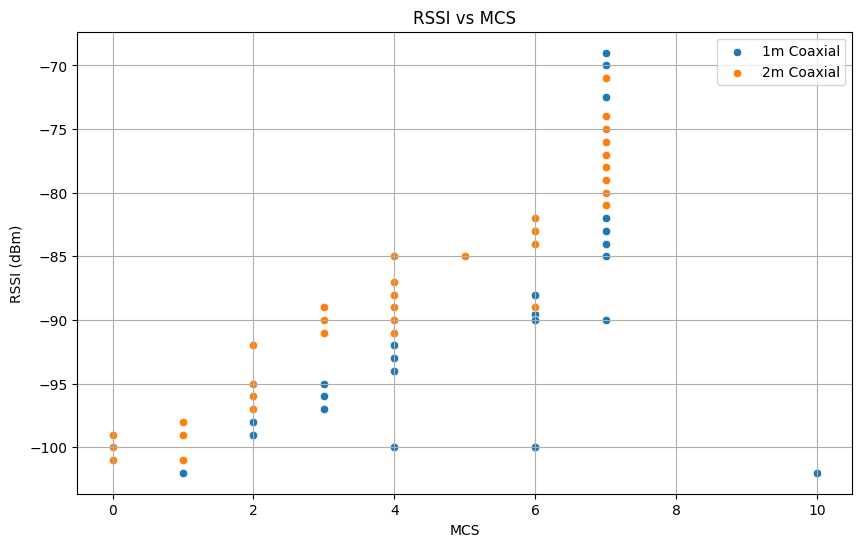

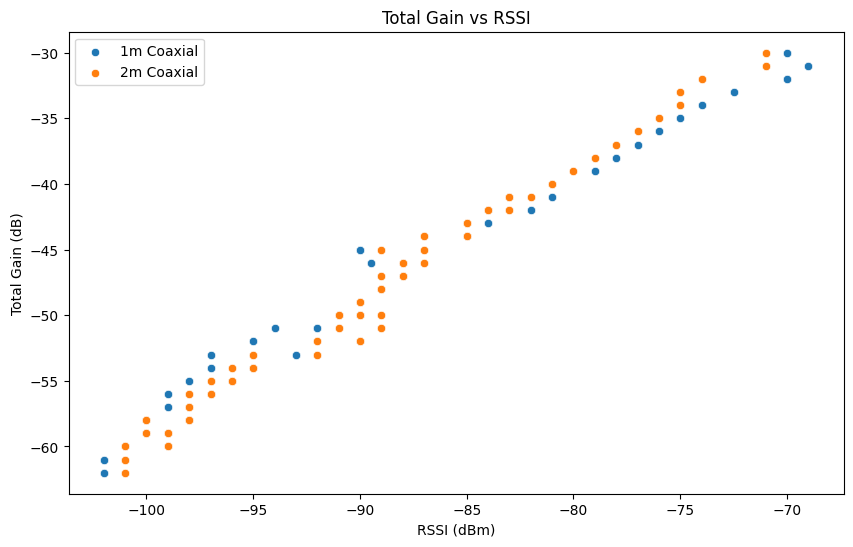

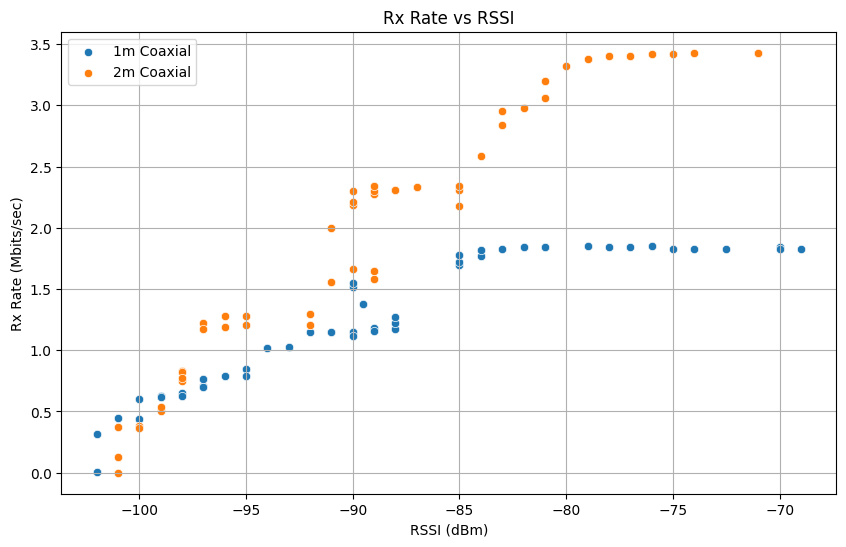

In [65]:
total_gain_1m_co = []
total_gain_2m_co = []
mcs_1m_in =[]
tx_rate_1m_in = []
rssi_1m_in = []

mcs_2m_in =[]
tx_rate_2m_in = []
rssi_2m_in = []

mcs_1m_co =[]
tx_rate_1m_co = []
rssi_1m_co = []

mcs_2m_co =[]
tx_rate_2m_co = []
rssi_2m_co = []



for scenario in scenarios_coaxial_1M:
    mcs_1m_co.append(scenario.mcs)
    tx_rate_1m_co.append(scenario.rx_iperf_bitrate)
    rssi_1m_co.append(scenario.rssi_median)
    total_gain_1m_co.append(scenario.total_gain)

for scenario in scenarios_coaxial_2M:
    mcs_2m_co.append(scenario.mcs)
    tx_rate_2m_co.append(scenario.rx_iperf_bitrate)
    rssi_2m_co.append(scenario.rssi_median)
    total_gain_2m_co.append(scenario.total_gain)



# Plotting MCS vs RSSI
plt.figure(figsize=(10, 6))
# sns.scatterplot(data=data_1m_in, y='RSSI', x='MCS', label='1m Indoor')
# sns.scatterplot(data=data_2m_in, y='RSSI', x='MCS', label='2m Indoor')
sns.scatterplot(data=data_1m_co, y='RSSI', x='MCS', label='1m Coaxial')
sns.scatterplot(data=data_2m_co, y='RSSI', x='MCS', label='2m Coaxial')
plt.title('RSSI vs MCS')
plt.ylabel('RSSI (dBm)')
plt.xlabel('MCS')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=rssi_1m_co, y=total_gain_1m_co, label='1m Coaxial')
sns.scatterplot(x=rssi_2m_co, y=total_gain_2m_co, label='2m Coaxial')
plt.title('Total Gain vs RSSI')
plt.xlabel('RSSI (dBm)')
plt.ylabel('Total Gain (dB)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=rssi_1m_co, y=tx_rate_1m_co, label='1m Coaxial')
sns.scatterplot(x=rssi_2m_co, y=tx_rate_2m_co, label='2m Coaxial')
plt.title('Rx Rate vs RSSI')
plt.xlabel('RSSI (dBm)')
plt.ylabel('Rx Rate (Mbits/sec)')
plt.grid()
plt.legend()
plt.show()


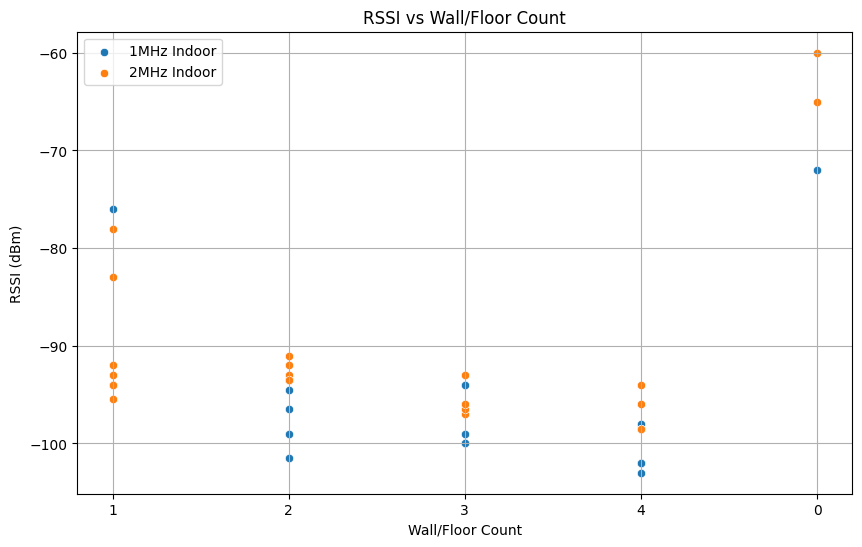

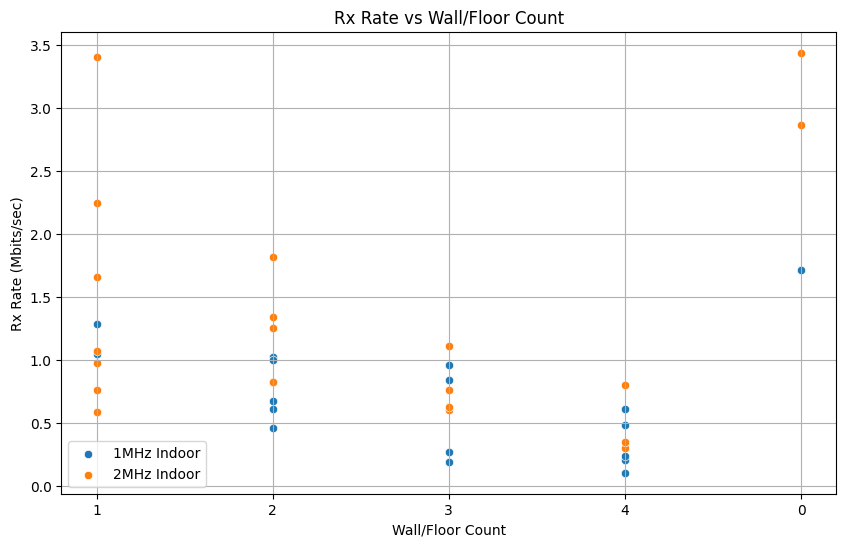

In [67]:
mcs_1m_in =[]
tx_rate_1m_in = []
rssi_1m_in = []
wall_1m_in = []

mcs_2m_in =[]
tx_rate_2m_in = []
rssi_2m_in = []
wall_2m_in = []


for scenario in scenarios_indoor_1M:
    mcs_1m_in.append(scenario.mcs)
    tx_rate_1m_in.append(scenario.rx_iperf_bitrate)
    rssi_1m_in.append(scenario.rssi_median)
    wall_1m_in.append(scenario.walls)

for scenario in scenarios_indoor_2M:
    mcs_2m_in.append(scenario.mcs)
    tx_rate_2m_in.append(scenario.rx_iperf_bitrate)
    rssi_2m_in.append(scenario.rssi_median)
    wall_2m_in.append(scenario.walls)



plt.figure(figsize=(10, 6))
sns.scatterplot(x=wall_1m_in, y=rssi_1m_in, label='1MHz Indoor')
sns.scatterplot(x=wall_2m_in, y=rssi_2m_in, label='2MHz Indoor')
plt.title('RSSI vs Wall/Floor Count')
plt.xlabel('Wall/Floor Count')
plt.ylabel('RSSI (dBm)')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=wall_1m_in, y=tx_rate_1m_in, label='1MHz Indoor')
sns.scatterplot(x=wall_2m_in, y=tx_rate_2m_in, label='2MHz Indoor')
plt.title('Rx Rate vs Wall/Floor Count')
plt.xlabel('Wall/Floor Count')
plt.ylabel('Rx Rate (Mbits/sec)')
plt.legend()
plt.grid()
plt.show()


